In [18]:
import opensmile 
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import svm
from pprint import pprint
base_path = "/home/ubuntu/"

## Read saved dataframes to generate features and labels

In [5]:
data_path_lj = base_path + 'testing-code/opensmile-feature-importance/smile_dfs/LJ_sample_11200.csv'
df = pd.read_csv(data_path_lj)

In [6]:
df.head()

,file,start,end,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,...,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope,label
0,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,0 days,0 days 00:00:06.531927438,2.255606,0.009317,0.214286,0.246159,0.494542,0.820717,0.248383,...,0.620289,2.236345,2.219888,19.675816,0.517250,105.152430,48.318115,99.288990,46.019333,0
1,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,0 days,0 days 00:00:08.250204082,2.478899,0.688725,0.093137,0.349024,0.710767,1.087815,0.361742,...,0.546407,3.298283,3.298329,-20.000000,0.466784,126.802810,60.297080,111.975380,78.029175,0
2,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,0 days,0 days 00:00:05.777278912,2.404334,0.089631,0.562390,0.361210,0.625174,1.103133,0.263965,...,0.426229,3.179683,3.202073,-19.708340,0.641415,126.600235,65.582650,133.139340,72.428530,0
3,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,0 days,0 days 00:00:07.785804989,1.841870,0.856957,0.998700,0.396953,0.643860,0.954928,0.246908,...,0.639111,2.808894,2.806713,19.999980,0.459220,128.068300,59.187996,113.987816,61.324000,0
4,/home/ubuntu/data/wavefake_data/LJSpeech_1.1/w...,0 days,0 days 00:00:07.124036281,2.283360,0.034139,0.022760,0.400029,0.714020,1.130978,0.313991,...,0.564978,2.923608,2.915823,19.985918,0.558662,123.728270,74.657330,120.433530,64.156030,0


In [7]:
y = df['label'].copy()
X = df.drop(columns=['file', 'start', 'end','label']).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
#standard scaling of input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#robust scaling of input data
scaler_ro = RobustScaler()
X_train_scaled_ro = scaler_ro.fit_transform(X_train)
X_test_scaled_ro = scaler_ro.transform(X_test)

In [12]:
#min-max scaling of data
scaler_mm = MinMaxScaler()
X_train_scaled_mm = scaler_mm.fit_transform(X_train)
X_test_scaled_mm = scaler_mm.transform(X_test)

## Experiment 1: Random Forest Classifier based Feature Importance

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 50]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

#criterion 
criterion = ['gini', 'entropy', 'log_loss']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 5, 10],
 'min_samples_split': [2, 5, 10, 50],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [27]:
rf = RandomForestClassifier()

In [28]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [30]:
rf_random.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=900; total time=  43.9s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=700; total time=  33.7s
[CV] END bootstrap=True, max_depth=80, max_features=log2, min_samples_leaf=1, min_samples_split=50, n_estimators=900; total time=  47.1s
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=900; total time=  43.2s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  27.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 6.7min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [31]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 50,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [32]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [33]:
#hyperparameter selection
n_estimators = 500 #default=100
criterion = "gini" #{“gini”, “entropy”, “log_loss”}, default=”gini”
max_depth = 8 #default=None 
min_samples_split = 2 #default=2 The minimum number of samples required to split an internal node
min_samples_leaf = 1 #default=1 The minimum number of samples required to be at a leaf node.
min_weight_fraction_leaf = 0.0 #The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
max_features = "log2" #default="sqrt" The number of features to consider when looking for the best split:
max_leaf_nodes = None #Grow trees with max_leaf_nodes in best-first fashion.
min_impurity_decrease = 0.0 #A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
bootstrap = True #default = True Whether bootstrap samples are used when building trees.
oob_score = True #default = False Whether to use out-of-bag samples to estimate the generalization score.
n_jobs = -1 #default=None -1 means all processors
random_state = None #deafult=None controls randomness of bootstrapping
verbose = 0 
warm_start = False #deafult = False When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.
max_samples = None #If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [34]:
#define model
base_model = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    criterion=criterion,
                                    max_features=max_features,
                                    bootstrap=bootstrap,
                                    oob_score=oob_score,
                                    n_jobs=n_jobs)

base_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500,
                       n_jobs=-1, oob_score=True)

In [36]:
base_preds = base_model.predict(X_test_scaled)
base_accuracy = accuracy_score(y_test,preds)

In [38]:
base_accuracy*100

77.76785714285714

In [39]:
best_random = rf_random.best_estimator_
random_preds = best_random.predict(X_test_scaled)
random_accuracy = accuracy_score(y_test, random_preds)

In [40]:
random_accuracy*100

86.29464285714286

In [41]:
#get feature importance 
importance_base = base_model.feature_importances_
importance_random = best_random.feature_importances_

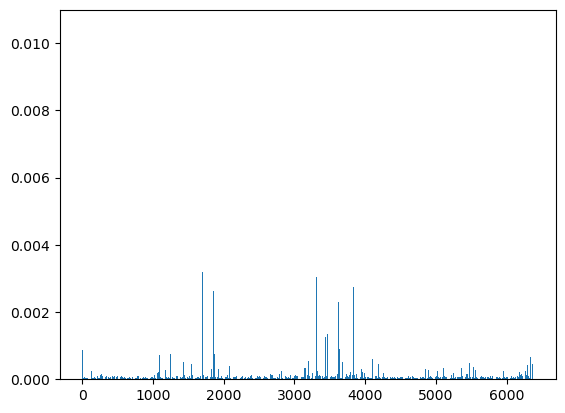

In [42]:
# plot feature importance
plt.bar([x for x in range(len(importance_base))], importance_base)
plt.show()

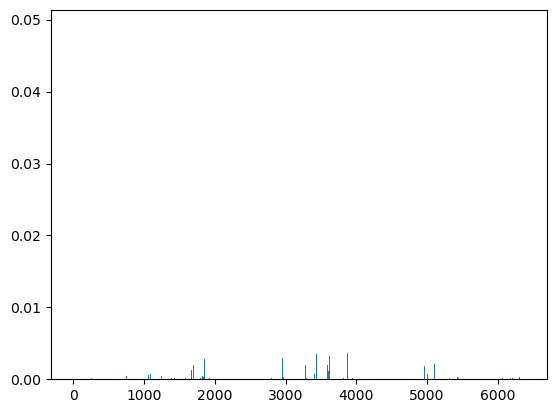

In [43]:
# plot feature importance
plt.bar([x for x in range(len(importance_random))], importance_random)
plt.show()

In [46]:
importance_base

array([6.21672930e-04, 3.36937091e-05, 6.06445659e-05, ...,
       1.82278563e-04, 4.37050272e-04, 4.33503114e-04])

In [71]:
features = X.columns.to_list()
top_k_features = np.argsort(importance_random)[-50:]
tresh=importance_random[top_k_features[0]]
# summarize feature importance
for i,v in enumerate(importance_random):
    if v >= tresh:
        print('Feature: %s, Score: %.5f' % (features[i],v))

Feature: pcm_fftMag_spectralFlux_sma_percentile99.0, Score: 0.00319
Feature: pcm_fftMag_spectralFlux_sma_stddev, Score: 0.00468
Feature: mfcc_sma[6]_lpc1, Score: 0.00635
Feature: mfcc_sma[7]_lpc1, Score: 0.00391
Feature: mfcc_sma[8]_lpc1, Score: 0.00505
Feature: mfcc_sma[9]_lpgain, Score: 0.00337
Feature: mfcc_sma[9]_lpc1, Score: 0.00336
Feature: mfcc_sma[10]_lpgain, Score: 0.00358
Feature: mfcc_sma[10]_lpc1, Score: 0.00429
Feature: mfcc_sma[11]_lpc1, Score: 0.00412
Feature: mfcc_sma[12]_lpgain, Score: 0.00466
Feature: mfcc_sma[12]_lpc1, Score: 0.00349
Feature: mfcc_sma_de[3]_lpc1, Score: 0.00424
Feature: mfcc_sma_de[5]_lpc0, Score: 0.00384
Feature: mfcc_sma_de[5]_lpc1, Score: 0.00423
Feature: mfcc_sma_de[5]_lpc2, Score: 0.00402
Feature: mfcc_sma_de[6]_lpgain, Score: 0.00325
Feature: mfcc_sma_de[6]_lpc0, Score: 0.00597
Feature: mfcc_sma_de[6]_lpc1, Score: 0.00591
Feature: mfcc_sma_de[6]_lpc2, Score: 0.00473
Feature: mfcc_sma_de[6]_lpc3, Score: 0.00455
Feature: mfcc_sma_de[7]_lpc1, Scor

In [72]:
features = X.columns.to_list()
top_k_features = np.argsort(importance_base)[-50:]
tresh=importance_base[top_k_features[0]]
# summarize feature importance
for i,v in enumerate(importance_base):
    if v >= tresh:
        print('Feature: %s, Score: %.5f' % (features[i],v))

Feature: mfcc_sma[3]_lpc0, Score: 0.00256
Feature: mfcc_sma[5]_lpc1, Score: 0.00249
Feature: mfcc_sma[6]_lpc1, Score: 0.00320
Feature: mfcc_sma[8]_lpc0, Score: 0.00262
Feature: mfcc_sma[8]_lpc1, Score: 0.00394
Feature: mfcc_sma[9]_lpgain, Score: 0.00266
Feature: mfcc_sma[9]_lpc0, Score: 0.00320
Feature: mfcc_sma[9]_lpc1, Score: 0.00341
Feature: mfcc_sma[10]_lpgain, Score: 0.00253
Feature: mfcc_sma[10]_lpc1, Score: 0.00457
Feature: mfcc_sma[11]_lpc0, Score: 0.00264
Feature: mfcc_sma[11]_lpc1, Score: 0.00263
Feature: mfcc_sma[12]_lpgain, Score: 0.00303
Feature: mfcc_sma[12]_lpc0, Score: 0.00253
Feature: mfcc_sma[12]_lpc1, Score: 0.00335
Feature: mfcc_sma[13]_lpc1, Score: 0.00306
Feature: mfcc_sma_de[2]_lpc1, Score: 0.00265
Feature: mfcc_sma_de[3]_lpc0, Score: 0.00305
Feature: mfcc_sma_de[3]_lpc1, Score: 0.00303
Feature: mfcc_sma_de[3]_lpc3, Score: 0.00337
Feature: mfcc_sma_de[4]_lpc1, Score: 0.00266
Feature: mfcc_sma_de[5]_lpc0, Score: 0.00291
Feature: mfcc_sma_de[5]_lpc2, Score: 0.00263

In [73]:
len(features), len(importance_base)

(6373, 6373)

In [83]:
features = X.columns.to_list()
top_k_features = np.argsort(importance_base)[-50:]
tresh=importance_base[top_k_features[0]]
feats = []
scores = []
for feat, imp in zip(features,importance_base):
    if imp>=tresh:
        feats.append(feat)
        scores.append(imp)
sorted([x+', '+str(y) for y, x in sorted(zip(scores, feats), reverse=True)]  )    

['jitterDDP_sma_flatness, 0.005015396617311733',
 'jitterDDP_sma_percentile1.0, 0.009265717094582512',
 'jitterDDP_sma_quartile1, 0.010473936607194935',
 'jitterDDP_sma_quartile2, 0.004230475875813218',
 'jitterLocal_sma_flatness, 0.002558319121339075',
 'jitterLocal_sma_percentile1.0, 0.006746516416097909',
 'jitterLocal_sma_quartile1, 0.0032556473020310286',
 'mfcc_sma[10]_lpc1, 0.00456537854906307',
 'mfcc_sma[10]_lpgain, 0.002526754449931514',
 'mfcc_sma[11]_lpc0, 0.002642411218872022',
 'mfcc_sma[11]_lpc1, 0.0026279211479126948',
 'mfcc_sma[12]_lpc0, 0.0025323982360133464',
 'mfcc_sma[12]_lpc1, 0.0033457843842171027',
 'mfcc_sma[12]_lpgain, 0.0030304887010944043',
 'mfcc_sma[13]_lpc1, 0.0030630575757167955',
 'mfcc_sma[3]_lpc0, 0.0025582083742372915',
 'mfcc_sma[5]_lpc1, 0.0024852687891118727',
 'mfcc_sma[6]_lpc1, 0.003200684674686743',
 'mfcc_sma[8]_lpc0, 0.0026197813812241914',
 'mfcc_sma[8]_lpc1, 0.003935292927425248',
 'mfcc_sma[9]_lpc0, 0.003201447382863641',
 'mfcc_sma[9]_lp

In [84]:
features = X.columns.to_list()
top_k_features = np.argsort(importance_random)[-50:]
tresh=importance_random[top_k_features[0]]
feats = []
scores = []
for feat, imp in zip(features,importance_random):
    if imp>=tresh:
        feats.append(feat)
        scores.append(imp)
sorted([x+', '+str(y) for y, x in sorted(zip(scores, feats), reverse=True)] )     

['jitterDDP_sma_flatness, 0.023452246688238386',
 'jitterDDP_sma_percentile1.0, 0.04205139508738413',
 'jitterDDP_sma_quartile1, 0.04894160860193733',
 'jitterDDP_sma_quartile2, 0.02309409289411957',
 'jitterLocal_sma_flatness, 0.009337636665702434',
 'jitterLocal_sma_percentile1.0, 0.03285387787891452',
 'jitterLocal_sma_quartile1, 0.011413294902804426',
 'logHNR_sma_pctlrange0-1, 0.004221050786269417',
 'logHNR_sma_percentile99.0, 0.0036484330533483075',
 'mfcc_sma[10]_lpc1, 0.004289559016052463',
 'mfcc_sma[10]_lpgain, 0.00357828766440754',
 'mfcc_sma[11]_lpc1, 0.004124439692773839',
 'mfcc_sma[12]_lpc1, 0.0034887416046000394',
 'mfcc_sma[12]_lpgain, 0.004664636038780241',
 'mfcc_sma[6]_lpc1, 0.006349405349898589',
 'mfcc_sma[7]_lpc1, 0.0039055037480916514',
 'mfcc_sma[8]_lpc1, 0.005049080944035127',
 'mfcc_sma[9]_lpc1, 0.0033620579283637824',
 'mfcc_sma[9]_lpgain, 0.003370772100136075',
 'mfcc_sma_de[10]_lpc0, 0.003781476450338392',
 'mfcc_sma_de[10]_lpc1, 0.005321299330379819',
 '